In [14]:
# Import libraries
import numpy as np
import pandas as pd
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Check files present in directory
print(check_output(["ls", "../kaggle/input"]).decode("utf8"))

sample_submission.csv
test.tsv
train.tsv



In [16]:
# Import training and test datasets
train = pd.read_csv('../kaggle/input/train.tsv', sep='\t')
test = pd.read_csv('../kaggle/input/test.tsv', sep='\t')

In [17]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


#### Let us get some details about each attribute present in the train dataset

In [70]:
print "There are",len(train.brand_name.unique()),"brand names."
print "There are",len(train.item_condition_id.unique()),\
                    "item condition states:", train.item_condition_id.unique() 
print "There are",len(train.category_name.unique()),"categories."

There are 4810 brand names.
There are 5 item condition states: [3 1 2 4 5]
There are 1288 categories.


In [38]:
# Check the presence of null values in attributes
print train.name.isnull().unique()
print train.item_condition_id.isnull().unique()
print train.category_name.isnull().unique()
print train.brand_name.isnull().unique()

[False]
[False]
[False  True]
[ True False]


In [39]:
# Replace NaN with None
train.category_name[train['category_name'].isnull()] = 'None'

/Users/sachin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
# Replace NaN with None
train.brand_name[train['brand_name'].isnull()] = 'None'

/Users/sachin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
# Check presence of null after replacement
print train.category_name.isnull().unique()
print train.brand_name.isnull().unique()

[False]
[False]


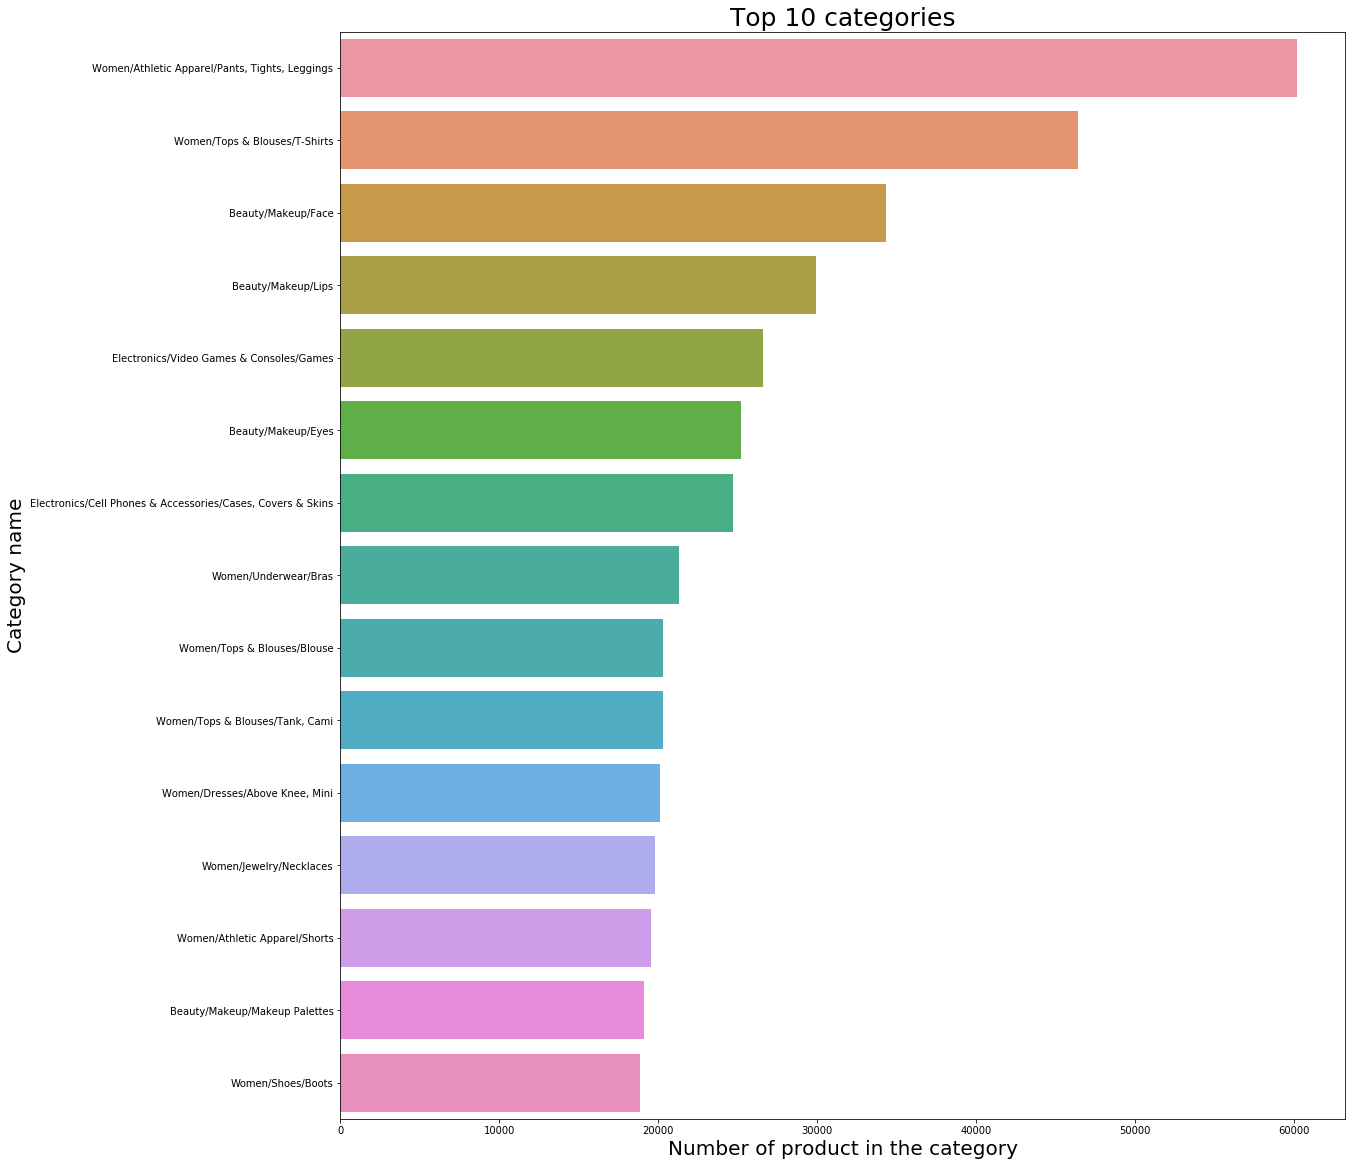

In [73]:
# Top 15 brand categories by number of products
plt.figure(figsize=(18,20))
sns.countplot(y = train.category_name, \
              order = train.category_name.value_counts().iloc[:15].index)
plt.title('Top 10 categories', fontsize = 25)
plt.ylabel('Category name', fontsize = 20)
plt.xlabel('Number of product in the category', fontsize = 20)
plt.show()

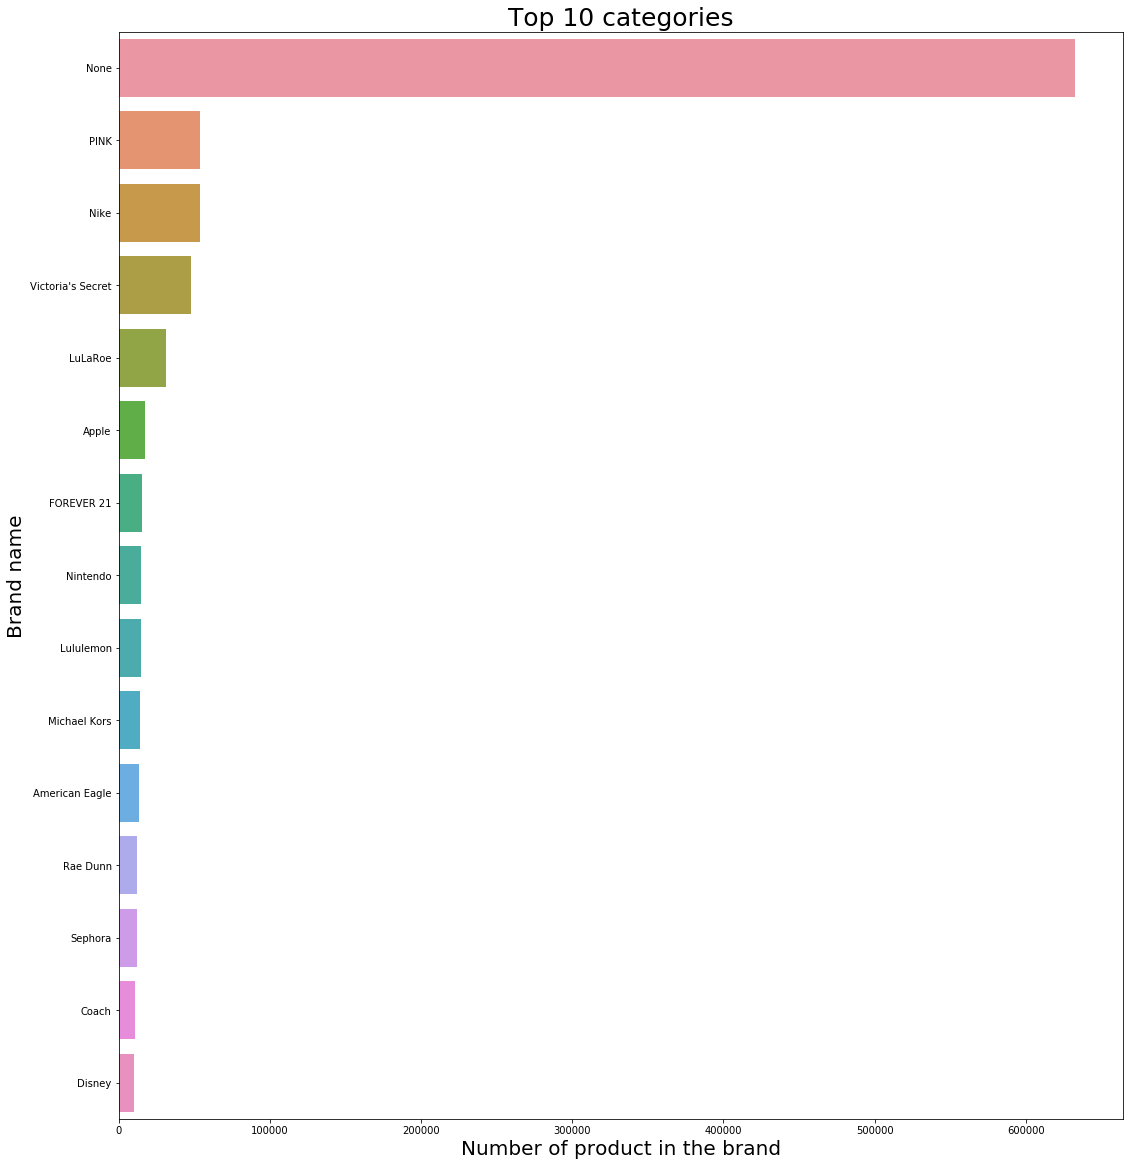

In [74]:
# Top 15 brand names by number of products
plt.figure(figsize=(18,20))
sns.countplot(y = train.brand_name, \
              order = train.brand_name.value_counts().iloc[:15].index)
plt.title('Top 10 categories', fontsize = 25)
plt.ylabel('Brand name', fontsize = 20)
plt.xlabel('Number of product in the brand', fontsize = 20)
plt.show()